In [143]:
# 기본적 modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False
import seaborn as sns

# 회귀분석 modules
import statsmodels.api as sm
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LogisticRegression
from scipy.stats.mstats import winsorize

# 머신러닝 modules

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV

# plotly 버전문제 해결 코드
import plotly.offline as pyo 
import plotly.graph_objects as go
pyo.init_notebook_mode()

# warnings 무시
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_curve

In [69]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

# 정상기간 데이터
## 16~18 데이터

### 16~18 외감 이자보상배율 기준 가져오기

In [2]:
# 자료 불러오기(천단위 쉼표 제거하고 정수로 불러오기)
normal_1618 = pd.read_csv('./00_02_영손(더미종합).csv', encoding='CP949')
normal_1618.head(5)

구분  총자산증가율2002  유동자산증가율2002  매출액증가율2002  매출액순이익률2002  \
0    (주)건잠디지털   -0.420778    -0.321275   -0.499324    -1.488662   
1  (주)게스템프카테크   -0.024956     0.116838    0.557882     0.031276   
2     (주)경동개발    0.065035     0.138245    0.210109     0.194375   
3     (주)경인일보   -0.492582    -0.119520    0.090396    -0.019616   
4    (주)국일인토트   -0.075674    -0.055084    0.016671     0.040211   

   매출원가대매출액비율2002  자기자본순이익률2002  총자산순이익률2002  매출액대판매관리비2002  매출채권회전율2002  ...  \
0        0.888239     -2.204502    -0.762128       0.771760     1.462560  ...   
1        0.897395      0.149613     0.037139       0.050704     9.651881  ...   
2        0.901834      0.123900     0.084257       0.161545     5.590369  ...   
3        0.683101     -0.065465    -0.024159       0.744100     4.202426  ...   
4        0.721721      0.336310     0.033990       0.179738     8.980763  ...   

   부채/매출액2002  부채/현금흐름2002  유동부채/부채2002  현금흐름/매출액2002  차입금평균금리2002  \
0    1.278014    -4.800855     0.470543     -0.266206        11.85   
1    0.633081  -536.481831     0.691897     -0.001180         7.72   
2    0.738125     8.508286     0.527628      0.086754         6.16   
3    0.512323    28.125510     0.580406      0.018216         7.54   
4    1.063459   162.839230     0.825171      0.006531         8.48   

   이자보상배율2002  매출  자산  업종  정상기업여부  
0   -5.377087   0   0   0       0  
1    1.496306   2   1   0       1  
2 -479.623944   1   2   0       0  
3  -49.678698   1   0   1       0  
4    1.550988   1   0   0       1  

[5 rows x 32 columns]

<AxesSubplot:>

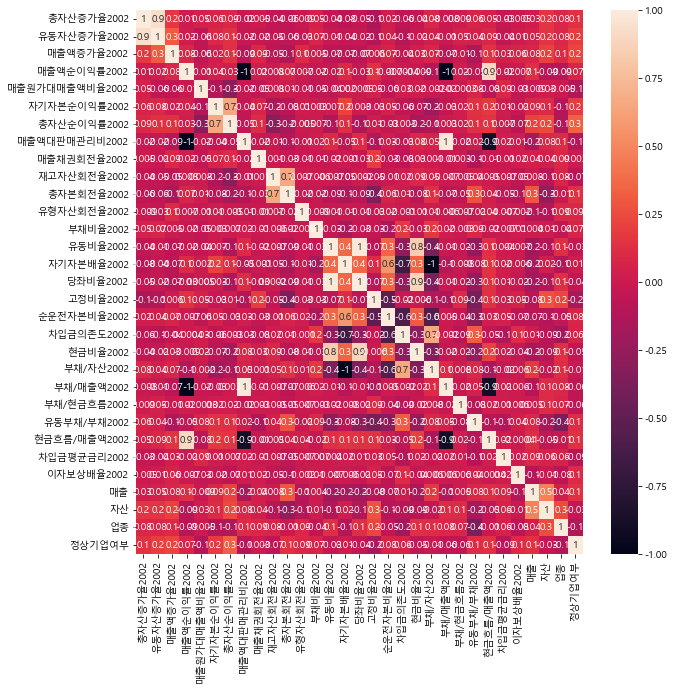

In [3]:
# 히트맵으로 시각화
corr_df = normal_1618.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, annot=True, fmt='.1g')

In [4]:
normal_1618.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   구분              200 non-null    object 
 1   총자산증가율2002      200 non-null    float64
 2   유동자산증가율2002     200 non-null    float64
 3   매출액증가율2002      200 non-null    float64
 4   매출액순이익률2002     200 non-null    float64
 5   매출원가대매출액비율2002  200 non-null    float64
 6   자기자본순이익률2002    200 non-null    float64
 7   총자산순이익률2002     200 non-null    float64
 8   매출액대판매관리비2002   200 non-null    float64
 9   매출채권회전율2002     200 non-null    float64
 10  재고자산회전율2002     200 non-null    float64
 11  총자본회전율2002      200 non-null    float64
 12  유형자산회전율2002     200 non-null    float64
 13  부채비율2002        200 non-null    float64
 14  유동비율2002        200 non-null    float64
 15  자기자본배율2002      200 non-null    float64
 16  당좌비율2002        200 non-null    float64
 17  고정비율2002        200 non-null    flo

In [5]:
# 빈 값 있는 지 확인
normal_1618_nasum = normal_1618.isna().sum()
normal_1618_nasum

구분                0
총자산증가율2002        0
유동자산증가율2002       0
매출액증가율2002        0
매출액순이익률2002       0
매출원가대매출액비율2002    0
자기자본순이익률2002      0
총자산순이익률2002       0
매출액대판매관리비2002     0
매출채권회전율2002       0
재고자산회전율2002       0
총자본회전율2002        0
유형자산회전율2002       0
부채비율2002          0
유동비율2002          0
자기자본배율2002        0
당좌비율2002          0
고정비율2002          0
순운전자본비율2002       0
차입금의존도2002        0
현금비율2002          0
부채/자산2002         0
부채/매출액2002        0
부채/현금흐름2002       0
유동부채/부채2002       0
현금흐름/매출액2002      0
차입금평균금리2002       0
이자보상배율2002        0
매출                0
자산                0
업종                0
정상기업여부            0
dtype: int64

In [6]:
# null값 제거한 데이터
print('### 18년 이자보상배율 기준 기업 수 비교 ###')
print(f"총 기업수 : {len(normal_1618)}")
print(f"회생기업 수 : {len(normal_1618[normal_1618['정상기업여부'] == 1])}")
print(f"미회생기업 수 : {len(normal_1618[normal_1618['정상기업여부'] == 0])}")

### 18년 이자보상배율 기준 기업 수 비교 ###
총 기업수 : 200
회생기업 수 : 81
미회생기업 수 : 119


In [7]:
# inf 값 확인

normal_1618[normal_1618.isin([np.inf, -np.inf]).any(1)]

Empty DataFrame
Columns: [구분, 총자산증가율2002, 유동자산증가율2002, 매출액증가율2002, 매출액순이익률2002, 매출원가대매출액비율2002, 자기자본순이익률2002, 총자산순이익률2002, 매출액대판매관리비2002, 매출채권회전율2002, 재고자산회전율2002, 총자본회전율2002, 유형자산회전율2002, 부채비율2002, 유동비율2002, 자기자본배율2002, 당좌비율2002, 고정비율2002, 순운전자본비율2002, 차입금의존도2002, 현금비율2002, 부채/자산2002, 부채/매출액2002, 부채/현금흐름2002, 유동부채/부채2002, 현금흐름/매출액2002, 차입금평균금리2002, 이자보상배율2002, 매출, 자산, 업종, 정상기업여부]
Index: []

[0 rows x 32 columns]

In [8]:
# inf, -inf값 삭제
normal_1618_drop = normal_1618.replace([np.inf, -np.inf], np.nan).dropna()
normal_1618_drop

구분  총자산증가율2002  유동자산증가율2002  매출액증가율2002  매출액순이익률2002  \
0      (주)건잠디지털   -0.420778    -0.321275   -0.499324    -1.488662   
1    (주)게스템프카테크   -0.024956     0.116838    0.557882     0.031276   
2       (주)경동개발    0.065035     0.138245    0.210109     0.194375   
3       (주)경인일보   -0.492582    -0.119520    0.090396    -0.019616   
4      (주)국일인토트   -0.075674    -0.055084    0.016671     0.040211   
..          ...         ...          ...         ...          ...   
195    현대아산주식회사   -0.091266    -0.297828    0.992012    -0.125071   
196   현대합성공업(주)    0.103463     0.227657   -0.002216     0.008028   
197    화남산업주식회사   -0.125152    -0.034013   -0.008704    -0.199802   
198  후지테크코리아(주)    0.057699     0.118045   -0.132631     0.068508   
199   휘닉스중앙주식회사   -0.066133     1.577388    0.191650    -0.044267   

     매출원가대매출액비율2002  자기자본순이익률2002  총자산순이익률2002  매출액대판매관리비2002  매출채권회전율2002  \
0          0.888239     -2.204502    -0.762128       0.771760     1.462560   
1          0.897395      0.149613     0.037139       0.050704     9.651881   
2          0.901834      0.123900     0.084257       0.161545     5.590369   
3          0.683101     -0.065465    -0.024159       0.744100     4.202426   
4          0.721721      0.336310     0.033990       0.179738     8.980763   
..              ...           ...          ...            ...          ...   
195        1.299270     -0.052283    -0.024107       0.250053    53.459180   
196        0.893567      0.050953     0.015035       0.103714     8.000791   
197        0.809242     -0.150764    -0.129271       0.236552     8.177560   
198        0.868577      0.267951     0.086237       0.076614     3.312108   
199        0.110630     -0.057253    -0.006522       0.998159    14.868380   

     ...  부채/매출액2002  부채/현금흐름2002  유동부채/부채2002  현금흐름/매출액2002  차입금평균금리2002  \
0    ...    1.278014    -4.800855     0.470543     -0.266206        11.85   
1    ...    0.633081  -536.481831     0.691897     -0.001180         7.72   
2    ...    0.738125     8.508286     0.527628      0.086754         6.16   
3    ...    0.512323    28.125510     0.580406      0.018216         7.54   
4    ...    1.063459   162.839230     0.825171      0.006531         8.48   
..   ...         ...          ...          ...           ...          ...   
195  ...    2.795993    13.452546     0.214113      0.207841       713.14   
196  ...    0.376429    18.211228     0.683823      0.020670         7.47   
197  ...    0.220341    47.235926     0.915115      0.004665         6.91   
198  ...    0.538739    25.653745     0.635718      0.021000         5.58   
199  ...    6.013880  4221.548789     0.186794      0.001425        10.34   

     이자보상배율2002  매출  자산  업종  정상기업여부  
0     -5.377087   0   0   0       0  
1      1.496306   2   1   0       1  
2   -479.623944   1   2   0       0  
3    -49.678698   1   0   1       0  
4      1.550988   1   0   0       1  
..          ...  ..  ..  ..     ...  
195   -1.549947   2   2   1       0  
196    0.483663   1   0   0       1  
197   -6.888342   1   1   0       0  
198   11.769839   1   1   0       1  
199   -1.284226   2   2   1       0  

[200 rows x 32 columns]

In [9]:
# inf, -inf 삭제 후 분석 사용할 최종 데이터
print('### 18년 이자보상배율 기준 기업 수 비교 ###')
print(f"총 기업수 : {len(normal_1618_drop)}")
print(f"회생기업 수 : {len(normal_1618_drop[normal_1618_drop['정상기업여부'] == 1])}")
print(f"미회생기업 수 : {len(normal_1618_drop[normal_1618_drop['정상기업여부'] == 0])}")

### 18년 이자보상배율 기준 기업 수 비교 ###
총 기업수 : 200
회생기업 수 : 81
미회생기업 수 : 119


In [10]:
# 회사명(구분)을 index로 바꾸기
normal_1618_df = normal_1618_drop.set_index(['구분'])
normal_1618_df

총자산증가율2002  유동자산증가율2002  매출액증가율2002  매출액순이익률2002  매출원가대매출액비율2002  \
구분                                                                             
(주)건잠디지털     -0.420778    -0.321275   -0.499324    -1.488662        0.888239   
(주)게스템프카테크   -0.024956     0.116838    0.557882     0.031276        0.897395   
(주)경동개발       0.065035     0.138245    0.210109     0.194375        0.901834   
(주)경인일보      -0.492582    -0.119520    0.090396    -0.019616        0.683101   
(주)국일인토트     -0.075674    -0.055084    0.016671     0.040211        0.721721   
...                ...          ...         ...          ...             ...   
현대아산주식회사     -0.091266    -0.297828    0.992012    -0.125071        1.299270   
현대합성공업(주)     0.103463     0.227657   -0.002216     0.008028        0.893567   
화남산업주식회사     -0.125152    -0.034013   -0.008704    -0.199802        0.809242   
후지테크코리아(주)    0.057699     0.118045   -0.132631     0.068508        0.868577   
휘닉스중앙주식회사    -0.066133     1.577388    0.191650    -0.044267        0.110630   

            자기자본순이익률2002  총자산순이익률2002  매출액대판매관리비2002  매출채권회전율2002  \
구분                                                                  
(주)건잠디지털       -2.204502    -0.762128       0.771760     1.462560   
(주)게스템프카테크      0.149613     0.037139       0.050704     9.651881   
(주)경동개발         0.123900     0.084257       0.161545     5.590369   
(주)경인일보        -0.065465    -0.024159       0.744100     4.202426   
(주)국일인토트        0.336310     0.033990       0.179738     8.980763   
...                  ...          ...            ...          ...   
현대아산주식회사       -0.052283    -0.024107       0.250053    53.459180   
현대합성공업(주)       0.050953     0.015035       0.103714     8.000791   
화남산업주식회사       -0.150764    -0.129271       0.236552     8.177560   
후지테크코리아(주)      0.267951     0.086237       0.076614     3.312108   
휘닉스중앙주식회사      -0.057253    -0.006522       0.998159    14.868380   

            재고자산회전율2002  ...  부채/매출액2002  부채/현금흐름2002  유동부채/부채2002  \
구분                       ...                                         
(주)건잠디지털       4.836829  ...    1.278014    -4.800855     0.470543   
(주)게스템프카테크    28.515528  ...    0.633081  -536.481831     0.691897   
(주)경동개발        4.156200  ...    0.738125     8.508286     0.527628   
(주)경인일보       69.423487  ...    0.512323    28.125510     0.580406   
(주)국일인토트       2.619847  ...    1.063459   162.839230     0.825171   
...                 ...  ...         ...          ...          ...   
현대아산주식회사      67.147018  ...    2.795993    13.452546     0.214113   
현대합성공업(주)     50.476998  ...    0.376429    18.211228     0.683823   
화남산업주식회사       5.932103  ...    0.220341    47.235926     0.915115   
후지테크코리아(주)     7.041746  ...    0.538739    25.653745     0.635718   
휘닉스중앙주식회사      4.700059  ...    6.013880  4221.548789     0.186794   

            현금흐름/매출액2002  차입금평균금리2002  이자보상배율2002  매출  자산  업종  정상기업여부  
구분                                                                     
(주)건잠디지털       -0.266206        11.85   -5.377087   0   0   0       0  
(주)게스템프카테크     -0.001180         7.72    1.496306   2   1   0       1  
(주)경동개발         0.086754         6.16 -479.623944   1   2   0       0  
(주)경인일보         0.018216         7.54  -49.678698   1   0   1       0  
(주)국일인토트        0.006531         8.48    1.550988   1   0   0       1  
...                  ...          ...         ...  ..  ..  ..     ...  
현대아산주식회사        0.207841       713.14   -1.549947   2   2   1       0  
현대합성공업(주)       0.020670         7.47    0.483663   1   0   0       1  
화남산업주식회사        0.004665         6.91   -6.888342   1   1   0       0  
후지테크코리아(주)      0.021000         5.58   11.769839   1   1   0       1  
휘닉스중앙주식회사       0.001425        10.34   -1.284226   2   2   1       0  

[200 rows x 31 columns]

array([[<AxesSubplot:title={'center':'총자산증가율2002'}>,
        <AxesSubplot:title={'center':'유동자산증가율2002'}>,
        <AxesSubplot:title={'center':'매출액증가율2002'}>,
        <AxesSubplot:title={'center':'매출액순이익률2002'}>,
        <AxesSubplot:title={'center':'매출원가대매출액비율2002'}>,
        <AxesSubplot:title={'center':'자기자본순이익률2002'}>],
       [<AxesSubplot:title={'center':'총자산순이익률2002'}>,
        <AxesSubplot:title={'center':'매출액대판매관리비2002'}>,
        <AxesSubplot:title={'center':'매출채권회전율2002'}>,
        <AxesSubplot:title={'center':'재고자산회전율2002'}>,
        <AxesSubplot:title={'center':'총자본회전율2002'}>,
        <AxesSubplot:title={'center':'유형자산회전율2002'}>],
       [<AxesSubplot:title={'center':'부채비율2002'}>,
        <AxesSubplot:title={'center':'유동비율2002'}>,
        <AxesSubplot:title={'center':'자기자본배율2002'}>,
        <AxesSubplot:title={'center':'당좌비율2002'}>,
        <AxesSubplot:title={'center':'고정비율2002'}>,
        <AxesSubplot:title={'center':'순운전자본비율2002'}>],
       [<AxesSubplot:title={'center

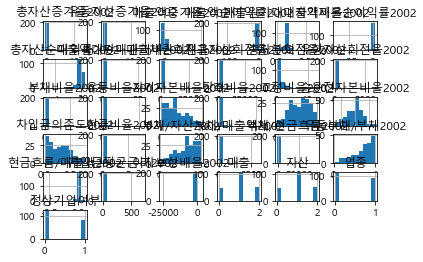

In [11]:
normal_1618_df.hist()

총자산증가율2002의 # 왜도 : 12.91  # 첨도 : 173.6
유동자산증가율2002의 # 왜도 : 11.07  # 첨도 : 138.38
매출액증가율2002의 # 왜도 : 5.58  # 첨도 : 33.98
매출액순이익률2002의 # 왜도 : -13.89  # 첨도 : 192.31
매출원가대매출액비율2002의 # 왜도 : 4.86  # 첨도 : 40.36


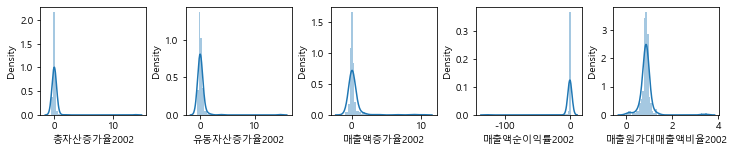

In [12]:
# distplot 분포 탐색
plt.rcParams["figure.figsize"] = (10,2)
fig, axes = plt.subplots(1,5, constrained_layout=True)

for i in range(0,5,1):
    sns.distplot(normal_1618_df.iloc[:,i], ax = axes[i])
    print(f'{normal_1618_df.columns[i]}의 # 왜도 : {np.round(skew(normal_1618_df.iloc[:,i]),2)}  # 첨도 : {np.round(kurtosis(normal_1618_df.iloc[:,i]),2)}')
plt.show()

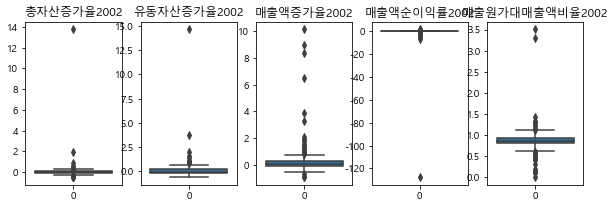

In [13]:
# 전체 박스플롯으로 이상치 탐색
plt.rcParams["figure.figsize"] = (10,3)
fig, axes = plt.subplots(1,5)

for i in range(0,5,1):
    sns.boxplot(data =(normal_1618_df).iloc[:,i], orient="v", ax = axes[i])
    axes[i].set_title(normal_1618_df.columns[i])
plt.show()

In [14]:
# 피쳐와 타겟값 분리
normal_1618_target = normal_1618_df['정상기업여부']
normal_1618_features = normal_1618_df.drop(['정상기업여부'], axis=1)
normal_1618_features

총자산증가율2002  유동자산증가율2002  매출액증가율2002  매출액순이익률2002  매출원가대매출액비율2002  \
구분                                                                             
(주)건잠디지털     -0.420778    -0.321275   -0.499324    -1.488662        0.888239   
(주)게스템프카테크   -0.024956     0.116838    0.557882     0.031276        0.897395   
(주)경동개발       0.065035     0.138245    0.210109     0.194375        0.901834   
(주)경인일보      -0.492582    -0.119520    0.090396    -0.019616        0.683101   
(주)국일인토트     -0.075674    -0.055084    0.016671     0.040211        0.721721   
...                ...          ...         ...          ...             ...   
현대아산주식회사     -0.091266    -0.297828    0.992012    -0.125071        1.299270   
현대합성공업(주)     0.103463     0.227657   -0.002216     0.008028        0.893567   
화남산업주식회사     -0.125152    -0.034013   -0.008704    -0.199802        0.809242   
후지테크코리아(주)    0.057699     0.118045   -0.132631     0.068508        0.868577   
휘닉스중앙주식회사    -0.066133     1.577388    0.191650    -0.044267        0.110630   

            자기자본순이익률2002  총자산순이익률2002  매출액대판매관리비2002  매출채권회전율2002  \
구분                                                                  
(주)건잠디지털       -2.204502    -0.762128       0.771760     1.462560   
(주)게스템프카테크      0.149613     0.037139       0.050704     9.651881   
(주)경동개발         0.123900     0.084257       0.161545     5.590369   
(주)경인일보        -0.065465    -0.024159       0.744100     4.202426   
(주)국일인토트        0.336310     0.033990       0.179738     8.980763   
...                  ...          ...            ...          ...   
현대아산주식회사       -0.052283    -0.024107       0.250053    53.459180   
현대합성공업(주)       0.050953     0.015035       0.103714     8.000791   
화남산업주식회사       -0.150764    -0.129271       0.236552     8.177560   
후지테크코리아(주)      0.267951     0.086237       0.076614     3.312108   
휘닉스중앙주식회사      -0.057253    -0.006522       0.998159    14.868380   

            재고자산회전율2002  ...  부채/자산2002  부채/매출액2002  부채/현금흐름2002  유동부채/부채2002  \
구분                       ...                                                    
(주)건잠디지털       4.836829  ...   0.654286    1.278014    -4.800855     0.470543   
(주)게스템프카테크    28.515528  ...   0.751766    0.633081  -536.481831     0.691897   
(주)경동개발        4.156200  ...   0.319960    0.738125     8.508286     0.527628   
(주)경인일보       69.423487  ...   0.630964    0.512323    28.125510     0.580406   
(주)국일인토트       2.619847  ...   0.898933    1.063459   162.839230     0.825171   
...                 ...  ...        ...         ...          ...          ...   
현대아산주식회사      67.147018  ...   0.538914    2.795993    13.452546     0.214113   
현대합성공업(주)     50.476998  ...   0.704932    0.376429    18.211228     0.683823   
화남산업주식회사       5.932103  ...   0.142559    0.220341    47.235926     0.915115   
후지테크코리아(주)     7.041746  ...   0.678162    0.538739    25.653745     0.635718   
휘닉스중앙주식회사      4.700059  ...   0.886080    6.013880  4221.548789     0.186794   

            현금흐름/매출액2002  차입금평균금리2002  이자보상배율2002  매출  자산  업종  
구분                                                             
(주)건잠디지털       -0.266206        11.85   -5.377087   0   0   0  
(주)게스템프카테크     -0.001180         7.72    1.496306   2   1   0  
(주)경동개발         0.086754         6.16 -479.623944   1   2   0  
(주)경인일보         0.018216         7.54  -49.678698   1   0   1  
(주)국일인토트        0.006531         8.48    1.550988   1   0   0  
...                  ...          ...         ...  ..  ..  ..  
현대아산주식회사        0.207841       713.14   -1.549947   2   2   1  
현대합성공업(주)       0.020670         7.47    0.483663   1   0   0  
화남산업주식회사        0.004665         6.91   -6.888342   1   1   0  
후지테크코리아(주)      0.021000         5.58   11.769839   1   1   0  
휘닉스중앙주식회사       0.001425        10.34   -1.284226   2   2   1  

[200 rows x 30 columns]

In [15]:
# 윈저라이징 후 다시 데이터 프레임 변환

normal_1618_win = []
for i in range(len(normal_1618_features.columns)):
  dt = winsorize(normal_1618_features.iloc[:,i], limits=[0.005, 0.005])
  normal_1618_win.append(np.ma.getdata(dt))
  # print(normal_1618_win)

normal_1618_win_df = pd.DataFrame(data=normal_1618_win, index=normal_1618_features.columns, columns=normal_1618_features.index).transpose()
normal_1618_win_df

총자산증가율2002  유동자산증가율2002  매출액증가율2002  매출액순이익률2002  매출원가대매출액비율2002  \
구분                                                                             
(주)건잠디지털     -0.420778    -0.321275   -0.499324    -1.488662        0.888239   
(주)게스템프카테크   -0.024956     0.116838    0.557882     0.031276        0.897395   
(주)경동개발       0.065035     0.138245    0.210109     0.194375        0.901834   
(주)경인일보      -0.492582    -0.119520    0.090396    -0.019616        0.683101   
(주)국일인토트     -0.075674    -0.055084    0.016671     0.040211        0.721721   
...                ...          ...         ...          ...             ...   
현대아산주식회사     -0.091266    -0.297828    0.992012    -0.125071        1.299270   
현대합성공업(주)     0.103463     0.227657   -0.002216     0.008028        0.893567   
화남산업주식회사     -0.125152    -0.034013   -0.008704    -0.199802        0.809242   
후지테크코리아(주)    0.057699     0.118045   -0.132631     0.068508        0.868577   
휘닉스중앙주식회사    -0.066133     1.577388    0.191650    -0.044267        0.110630   

            자기자본순이익률2002  총자산순이익률2002  매출액대판매관리비2002  매출채권회전율2002  \
구분                                                                  
(주)건잠디지털       -2.204502    -0.762128       0.771760     1.462560   
(주)게스템프카테크      0.149613     0.037139       0.050704     9.651881   
(주)경동개발         0.123900     0.084257       0.161545     5.590369   
(주)경인일보        -0.065465    -0.024159       0.744100     4.202426   
(주)국일인토트        0.336310     0.033990       0.179738     8.980763   
...                  ...          ...            ...          ...   
현대아산주식회사       -0.052283    -0.024107       0.250053    53.459180   
현대합성공업(주)       0.050953     0.015035       0.103714     8.000791   
화남산업주식회사       -0.150764    -0.129271       0.236552     8.177560   
후지테크코리아(주)      0.267951     0.086237       0.076614     3.312108   
휘닉스중앙주식회사      -0.057253    -0.006522       0.998159    14.868380   

            재고자산회전율2002  ...  부채/자산2002  부채/매출액2002  부채/현금흐름2002  유동부채/부채2002  \
구분                       ...                                                    
(주)건잠디지털       4.836829  ...   0.654286    1.278014    -4.800855     0.470543   
(주)게스템프카테크    28.515528  ...   0.751766    0.633081  -536.481831     0.691897   
(주)경동개발        4.156200  ...   0.319960    0.738125     8.508286     0.527628   
(주)경인일보       69.423487  ...   0.630964    0.512323    28.125510     0.580406   
(주)국일인토트       2.619847  ...   0.898933    1.063459   162.839230     0.825171   
...                 ...  ...        ...         ...          ...          ...   
현대아산주식회사      67.147018  ...   0.538914    2.795993    13.452546     0.214113   
현대합성공업(주)     50.476998  ...   0.704932    0.376429    18.211228     0.683823   
화남산업주식회사       5.932103  ...   0.142559    0.220341    47.235926     0.915115   
후지테크코리아(주)     7.041746  ...   0.678162    0.538739    25.653745     0.635718   
휘닉스중앙주식회사      4.700059  ...   0.886080    6.013880  4221.548789     0.186794   

            현금흐름/매출액2002  차입금평균금리2002  이자보상배율2002   매출   자산   업종  
구분                                                                
(주)건잠디지털       -0.266206        11.85   -5.377087  0.0  0.0  0.0  
(주)게스템프카테크     -0.001180         7.72    1.496306  2.0  1.0  0.0  
(주)경동개발         0.086754         6.16 -479.623944  1.0  2.0  0.0  
(주)경인일보         0.018216         7.54  -49.678698  1.0  0.0  1.0  
(주)국일인토트        0.006531         8.48    1.550988  1.0  0.0  0.0  
...                  ...          ...         ...  ...  ...  ...  
현대아산주식회사        0.207841       260.72   -1.549947  2.0  2.0  1.0  
현대합성공업(주)       0.020670         7.47    0.483663  1.0  0.0  0.0  
화남산업주식회사        0.004665         6.91   -6.888342  1.0  1.0  0.0  
후지테크코리아(주)      0.021000         5.58   11.769839  1.0  1.0  0.0  
휘닉스중앙주식회사       0.001425        10.34   -1.284226  2.0  2.0  1.0  

[200 rows x 30 columns]

In [16]:
normal_1618_target

구분
(주)건잠디지털      0
(주)게스템프카테크    1
(주)경동개발       0
(주)경인일보       0
(주)국일인토트      1
             ..
현대아산주식회사      0
현대합성공업(주)     1
화남산업주식회사      0
후지테크코리아(주)    1
휘닉스중앙주식회사     0
Name: 정상기업여부, Length: 200, dtype: int64

array([[<AxesSubplot:title={'center':'총자산증가율2002'}>,
        <AxesSubplot:title={'center':'유동자산증가율2002'}>,
        <AxesSubplot:title={'center':'매출액증가율2002'}>,
        <AxesSubplot:title={'center':'매출액순이익률2002'}>,
        <AxesSubplot:title={'center':'매출원가대매출액비율2002'}>],
       [<AxesSubplot:title={'center':'자기자본순이익률2002'}>,
        <AxesSubplot:title={'center':'총자산순이익률2002'}>,
        <AxesSubplot:title={'center':'매출액대판매관리비2002'}>,
        <AxesSubplot:title={'center':'매출채권회전율2002'}>,
        <AxesSubplot:title={'center':'재고자산회전율2002'}>],
       [<AxesSubplot:title={'center':'총자본회전율2002'}>,
        <AxesSubplot:title={'center':'유형자산회전율2002'}>,
        <AxesSubplot:title={'center':'부채비율2002'}>,
        <AxesSubplot:title={'center':'유동비율2002'}>,
        <AxesSubplot:title={'center':'자기자본배율2002'}>],
       [<AxesSubplot:title={'center':'당좌비율2002'}>,
        <AxesSubplot:title={'center':'고정비율2002'}>,
        <AxesSubplot:title={'center':'순운전자본비율2002'}>,
        <AxesSubplot:title={'center

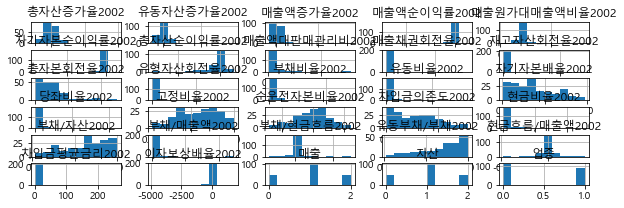

In [17]:
normal_1618_win_df.hist()

총자산증가율2002의 # 왜도 : 3.63  # 첨도 : 23.87
유동자산증가율2002의 # 왜도 : 4.11  # 첨도 : 24.83
매출액증가율2002의 # 왜도 : 5.41  # 첨도 : 31.76
매출액순이익률2002의 # 왜도 : -5.77  # 첨도 : 38.25
매출원가대매출액비율2002의 # 왜도 : 4.68  # 첨도 : 38.28


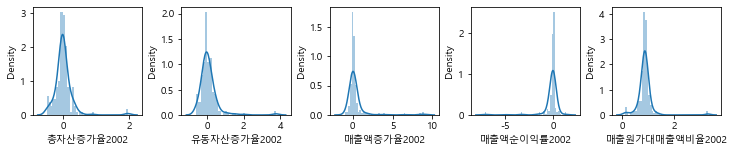

In [18]:
# distplot 분포 탐색
plt.rcParams["figure.figsize"] = (10,2)
fig, axes = plt.subplots(1,5, constrained_layout=True)

for i in range(0,5,1):
    sns.distplot(normal_1618_win_df.iloc[:,i], ax = axes[i])
    print(f'{normal_1618_win_df.columns[i]}의 # 왜도 : {np.round(skew(normal_1618_win_df.iloc[:,i]),2)}  # 첨도 : {np.round(kurtosis(normal_1618_win_df.iloc[:,i]),2)}')
plt.show()

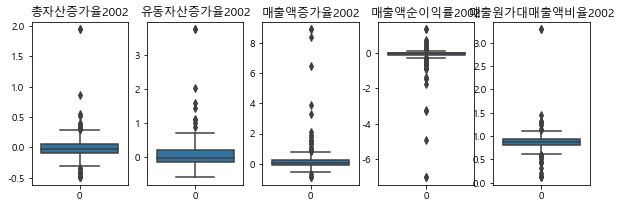

In [19]:
# 전체 박스플롯으로 이상치 탐색
plt.rcParams["figure.figsize"] = (10,3)
fig, axes = plt.subplots(1,5)

for i in range(0,5,1):
    sns.boxplot(data =(normal_1618_win_df).iloc[:,i], orient="v", ax = axes[i])
    axes[i].set_title(normal_1618_win_df.columns[i])
plt.show()

In [20]:
normal_1618_target

구분
(주)건잠디지털      0
(주)게스템프카테크    1
(주)경동개발       0
(주)경인일보       0
(주)국일인토트      1
             ..
현대아산주식회사      0
현대합성공업(주)     1
화남산업주식회사      0
후지테크코리아(주)    1
휘닉스중앙주식회사     0
Name: 정상기업여부, Length: 200, dtype: int64

In [21]:
normal_1618_win

[array([-4.20777733e-01, -2.49561219e-02,  6.50353534e-02, -4.92581841e-01,
        -7.56741161e-02, -2.91410596e-01, -3.48491404e-02,  1.34575214e-01,
        -9.33443134e-02,  2.83312570e-01, -1.21725202e-01,  1.63161389e-02,
         2.04185349e-02, -9.34464510e-02, -4.93436378e-01,  9.62813262e-02,
        -3.57837402e-02, -4.25552557e-03, -4.25552557e-03, -2.70724564e-02,
        -6.30585539e-02, -2.45613186e-02, -4.60404148e-02,  4.09224575e-01,
         5.12124203e-01, -2.88643793e-01, -4.86046666e-01, -1.08488759e-01,
        -1.72327233e-01, -2.82434550e-02, -9.75802033e-02, -2.50168646e-02,
         9.14052379e-02, -4.18083603e-02, -4.37068261e-02,  7.70376925e-02,
        -3.13732343e-02, -1.58947377e-02, -1.10962397e-01, -2.35750018e-02,
         1.24354152e-01, -2.05416500e-01, -1.18199411e-01,  6.30507999e-02,
        -9.61345669e-02,  3.07189186e-01,  1.41861090e-01,  5.09955142e-02,
         7.37768710e-02,  2.38605824e-02, -3.98145244e-02, -1.96018510e-02,
         1.8

#### 이자보상배율 빼주기

In [22]:
normal_1618_win_df1 = normal_1618_win_df.drop(['이자보상배율2002'], axis=1)
normal_1618_win_df2 = normal_1618_win_df1.drop(['부채/자산2002'], axis=1)

In [23]:
normal_1618_win_df2.corr()

총자산증가율2002  유동자산증가율2002  매출액증가율2002  매출액순이익률2002  \
총자산증가율2002        1.000000     0.563318    0.131854     0.052447   
유동자산증가율2002       0.563318     1.000000    0.441062     0.168483   
매출액증가율2002        0.131854     0.441062    1.000000     0.162889   
매출액순이익률2002       0.052447     0.168483    0.162889     1.000000   
매출원가대매출액비율2002    0.205268    -0.110376   -0.061770    -0.327384   
자기자본순이익률2002      0.184571     0.163213    0.052857     0.173511   
총자산순이익률2002       0.271462     0.275692    0.160170     0.393938   
매출액대판매관리비2002    -0.122650    -0.073603   -0.152525    -0.673980   
매출채권회전율2002       0.057247    -0.021914    0.089824     0.073383   
재고자산회전율2002      -0.107873    -0.112862   -0.062134     0.015427   
총자본회전율2002        0.004569    -0.010597   -0.151572     0.176144   
유형자산회전율2002      -0.005264     0.008598    0.074523     0.039802   
부채비율2002          0.113215     0.090007    0.041523    -0.101632   
유동비율2002         -0.119243    -0.003648   -0.072467    -0.273577   
자기자본배율2002        0.012926     0.063149   -0.074715     0.059809   
당좌비율2002         -0.117502    -0.000260   -0.062535    -0.239254   
고정비율2002         -0.050734    -0.026731    0.004214     0.028180   
순운전자본비율2002       0.024094     0.052801    0.067498     0.026661   
차입금의존도2002       -0.050328    -0.125661   -0.037159    -0.054527   
현금비율2002         -0.085639     0.002946    0.087345    -0.143109   
부채/매출액2002       -0.012841    -0.043266   -0.023637    -0.766733   
부채/현금흐름2002       0.002706     0.076576    0.024994     0.222236   
유동부채/부채2002       0.069695     0.009419   -0.131764     0.023921   
현금흐름/매출액2002      0.050024     0.203403    0.206077     0.237219   
차입금평균금리2002      -0.077606    -0.075698    0.023956    -0.032835   
매출                0.093600     0.106198    0.071122     0.244294   
자산                0.242728     0.180634    0.196944     0.034393   
업종                0.061130     0.063709    0.097029    -0.160452   

                매출원가대매출액비율2002  자기자본순이익률2002  총자산순이익률2002  매출액대판매관리비2002  \
총자산증가율2002            0.205268      0.184571     0.271462      -0.122650   
유동자산증가율2002          -0.110376      0.163213     0.275692      -0.073603   
매출액증가율2002           -0.061770      0.052857     0.160170      -0.152525   
매출액순이익률2002          -0.327384      0.173511     0.393938      -0.673980   
매출원가대매출액비율2002        1.000000     -0.094200    -0.311665      -0.024131   
자기자본순이익률2002         -0.094200      1.000000     0.520284      -0.093425   
총자산순이익률2002          -0.311665      0.520284     1.000000      -0.254327   
매출액대판매관리비2002        -0.024131     -0.093425    -0.254327       1.000000   
매출채권회전율2002          -0.051236      0.095415     0.111629      -0.042031   
재고자산회전율2002           0.017152     -0.157651    -0.234041      -0.008195   
총자본회전율2002            0.013273     -0.022595    -0.013014      -0.276107   
유형자산회전율2002          -0.003926      0.001599    -0.047530      -0.073768   
부채비율2002             -0.055191     -0.529631    -0.065177       0.082080   
유동비율2002             -0.075521      0.027948    -0.124935       0.421730   
자기자본배율2002            0.004977      0.262607     0.107849       0.132822   
당좌비율2002             -0.062944      0.025471    -0.101978       0.381076   
고정비율2002              0.049399     -0.041844     0.014112       0.026116   
순운전자본비율2002          -0.060147      0.122342    -0.014442       0.102976   
차입금의존도2002            0.026810     -0.131507    -0.018391      -0.137389   
현금비율2002             -0.032712     -0.057068    -0.106710       0.241766   
부채/매출액2002           -0.010188     -0.061199    -0.022713       0.471530   
부채/현금흐름2002          -0.036420      0.064051     0.039186      -0.017969   
유동부채/부채2002           0.072685      0.087563     0.100278      -0.146193   
현금흐름/매출액2002         -0.197326      0.253197     0.286448      -0.157682   
차입금평균금리2002           0.064922      0.011632    -0.000255       0.039385   
매출                   -0.011619      0.062064     0.212466      -0.3

In [24]:
# statsmodels의 logit 분석을 위해 X 변수 생성
X = normal_1618_win_df2.reset_index(drop=True)
y = normal_1618_target.reset_index(drop=True)

# y 변수 배열 조정
y = np.array(y).reshape(-1,1)
y.shape

print(X)
print(X.shape)
print(y.shape)

     총자산증가율2002  유동자산증가율2002  매출액증가율2002  매출액순이익률2002  매출원가대매출액비율2002  \
0     -0.420778    -0.321275   -0.499324    -1.488662        0.888239   
1     -0.024956     0.116838    0.557882     0.031276        0.897395   
2      0.065035     0.138245    0.210109     0.194375        0.901834   
3     -0.492582    -0.119520    0.090396    -0.019616        0.683101   
4     -0.075674    -0.055084    0.016671     0.040211        0.721721   
..          ...          ...         ...          ...             ...   
195   -0.091266    -0.297828    0.992012    -0.125071        1.299270   
196    0.103463     0.227657   -0.002216     0.008028        0.893567   
197   -0.125152    -0.034013   -0.008704    -0.199802        0.809242   
198    0.057699     0.118045   -0.132631     0.068508        0.868577   
199   -0.066133     1.577388    0.191650    -0.044267        0.110630   

     자기자본순이익률2002  총자산순이익률2002  매출액대판매관리비2002  매출채권회전율2002  재고자산회전율2002  ...  \
0       -2.204502    -0.762128       0.7717

In [25]:
X = normal_1618_win_df2.reset_index(drop=True).drop(['매출원가대매출액비율2002','매출액대판매관리비2002'],axis=1)
# ['매출액대판매관리비2002']


In [26]:
# 19차 로지스틱 분석

# 상수항 추가
X = sm.add_constant(X)

model = sm.GLM(y, X, family=sm.families.Binomial())
results = model.fit(atol=1e-10)
print(results.summary())
print(f'AIC Score : {results.aic:.4f}')
print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])
print(results.pvalues.index[abs(results.params)>2])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      173
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -70.421
Date:                Wed, 06 Jul 2022   Deviance:                       140.84
Time:                        10:14:18   Pearson chi2:                 2.21e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4757
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.3919      4.891     -0.489   

In [27]:
X1 = normal_1618_win_df2.reset_index(drop=True)[['매출원가대매출액비율2002','매출액대판매관리비2002','총자산증가율2002', '자기자본순이익률2002', '총자산순이익률2002', '자기자본배율2002','고정비율2002', '차입금의존도2002', '현금흐름/매출액2002']]
X = sm.add_constant(X1)

model = sm.GLM(y, X, family=sm.families.Binomial())
results = model.fit(atol=1e-10)
print(results.summary())
print(f'AIC Score : {results.aic:.4f}')
print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])
print(results.pvalues[abs(results.params)>2])

PerfectSeparationError: Perfect separation detected, results not available

# 매출액대판관비 먼저

In [28]:
X2 = normal_1618_win_df2.reset_index(drop=True)[['매출액대판매관리비2002','총자산증가율2002', '자기자본순이익률2002', '총자산순이익률2002', '자기자본배율2002','고정비율2002', '차입금의존도2002', '현금흐름/매출액2002']]
X = sm.add_constant(X2)

model = sm.GLM(y, X, family=sm.families.Binomial())
results = model.fit(atol=1e-10)
print(results.summary())
print(f'AIC Score : {results.aic:.4f}')
print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])
print(results.pvalues[abs(results.params)>2])

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      191
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -85.299
Date:                Wed, 06 Jul 2022   Deviance:                       170.60
Time:                        10:14:24   Pearson chi2:                 2.09e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3916
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4649      0.890      0.522

In [29]:
# 로지스틱 분석 

# 상수항 추가
p_v = 10
# 변수선언, 10이 아니여도 0.05보다 큰 값이면 상관 없습니다.

while float(0.05) < float(p_v):
    # p값이 0.05보다 크면 계속 변수가 1개씩 제거되는 반복문 코드입니다.
    X = sm.add_constant(X)

    model = sm.GLM(y, X, family=sm.families.Binomial())
    results = model.fit(atol=1e-10)
    p_v = results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))]
    # 여기서 p값이 가장 큰 변수가 지정됩니다.
    
    if len(p_v) == 1:
        if float(0.05) < float(p_v):  
            X.drop(p_v.index,axis=1,inplace=True)
        # p값이 가장 큰 인덱스 값을 지정하여 해당 열을 제거합니다.   
        print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])
        print(f'AIC Score : {results.aic:.4f}')
    
    else:
        t_v = results.tvalues[results.tvalues == min(abs(results.tvalues.drop('const',axis=0)))]
        X.drop(t_v.index,axis=1,inplace=True)
        print(results.tvalues[results.tvalues==max(results.tvalues.drop('const',axis=0))])
        print(f'AIC Score : {results.aic:.4f}')
    # 이때, 지워지는 변수의 이름과 p값을 표시합니다.

print(results.summary())
# 모든 불필요한 변수가 제거된 이후 최종 모델에 대한 summary 입니다.
print(f'AIC Score : {results.aic:.4f}')
print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])

총자산순이익률2002    0.796307
dtype: float64
AIC Score : 188.5985
자기자본배율2002    0.31831
dtype: float64
AIC Score : 186.6655
고정비율2002    0.264023
dtype: float64
AIC Score : 185.6721
현금흐름/매출액2002    0.155065
dtype: float64
AIC Score : 184.9282
차입금의존도2002    0.11769
dtype: float64
AIC Score : 185.1597
총자산증가율2002    0.034373
dtype: float64
AIC Score : 185.6544
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -88.827
Date:                Wed, 06 Jul 2022   Deviance:                       177.65
Time:                        10:14:26   Pearson chi2:                 2.00e+03
No. Iterations:

In [30]:
# 로지스틱 분석 

# 상수항 추가
p_v = 10
# 변수선언, 10이 아니여도 0.05보다 큰 값이면 상관 없습니다.

while float(0.05) < float(p_v):
    # p값이 0.05보다 크면 계속 변수가 1개씩 제거되는 반복문 코드입니다.
    X = sm.add_constant(X)

    model = sm.GLM(y, X, family=sm.families.Binomial())
    results = model.fit(atol=1e-10)
    p_v = results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))]
    # 여기서 p값이 가장 큰 변수가 지정됩니다.
    
    if len(p_v) == 1:
        if float(0.05) < float(p_v):  
            X.drop(p_v.index,axis=1,inplace=True)
        # p값이 가장 큰 인덱스 값을 지정하여 해당 열을 제거합니다.   
        print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])
        print(f'AIC Score : {results.aic:.4f}')
    
    else:
        t_v = results.tvalues[results.tvalues == min(abs(results.tvalues.drop('const',axis=0)))]
        X.drop(t_v.index,axis=1,inplace=True)
        print(results.tvalues[results.tvalues==max(results.tvalues.drop('const',axis=0))])
        print(f'AIC Score : {results.aic:.4f}')
    # 이때, 지워지는 변수의 이름과 p값을 표시합니다.

print(results.summary())
# 모든 불필요한 변수가 제거된 이후 최종 모델에 대한 summary 입니다.
print(f'AIC Score : {results.aic:.4f}')
print(results.pvalues[results.pvalues==max(results.pvalues.drop('const',axis=0))])

총자산증가율2002    0.034373
dtype: float64
AIC Score : 185.6544
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -88.827
Date:                Wed, 06 Jul 2022   Deviance:                       177.65
Time:                        10:14:27   Pearson chi2:                 2.00e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.3698
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

## 이런 식으로 p값 기준 가장 높은 변수들부터 삭제 해 주세요

### p값 삭제가 끝났다면 이제 자기상관 분석

In [32]:
# 상관성 분석
X.drop('const',axis=1,inplace=True)
corr_df = X.corr()

KeyError: "['const'] not found in axis"

<AxesSubplot:>

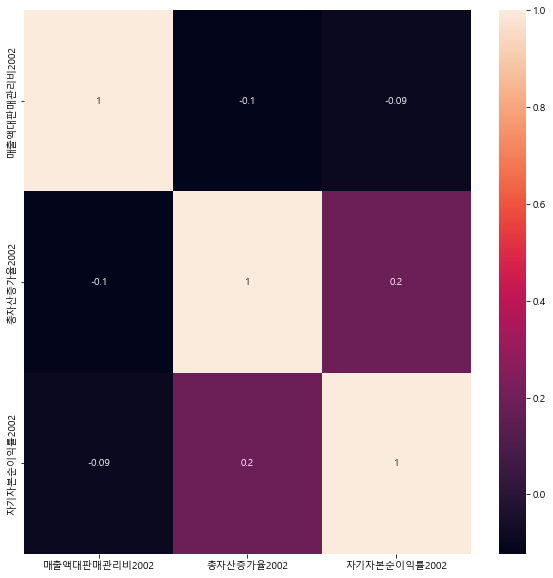

In [36]:
# 히트맵으로 시각화
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, annot=True, fmt='.1g')

### 상관분석은 일단 찍어만 봐주세요 빼야할지는 나중에 결정

### 변수선정은 이제 끝입니다. 여기부턴 모델링 해보는 과정

In [70]:
# 트레인, 테스트 셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [71]:
# GridSearchCV를 통한 로지스틱 회귀의 최적 하이퍼 파라미터 찾기
lg_clf = LogisticRegression(random_state=9)

params = {'penalty' : ['l2', 'l1', 'elasticnet'], 'C':[0.001, 0.01, 0.1, 1, 5, 10, 100], 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid_clf = GridSearchCV(lg_clf, param_grid=params, scoring='accuracy', cv=7)
grid_clf1 = GridSearchCV(lg_clf, param_grid=params, scoring='f1', cv=7)
grid_clf.fit(X, y)
grid_clf1.fit(X, y)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {np.round(grid_clf.best_score_,4)}')
print(f'최적 하이퍼 파라미터 : {grid_clf1.best_params_}, 최적 평균 F1스코어 : {np.round(grid_clf1.best_score_,4)}')

최적 하이퍼 파라미터 : {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}, 최적 평균 정확도 : 0.8353
최적 하이퍼 파라미터 : {'C': 10, 'penalty': 'l2', 'solver': 'sag'}, 최적 평균 F1스코어 : 0.7975


In [170]:
# 파라미터 튜닝 후 다시 로지스틱

lg_clf = LogisticRegression(C=10, penalty='l2', random_state=9, solver='sag')
lg_clf.fit(X_train,y_train)
y_pred = lg_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

print('### Logistic Regression 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')

### Logistic Regression 분류 결과 ###
ACC : 0.8500
Precision : 0.7857
Recall : 0.7857
F1 Score : 0.7857


자기자본순이익률2002     3.298838
총자산증가율2002       1.250017
매출액대판매관리비2002   -2.579964
dtype: float64


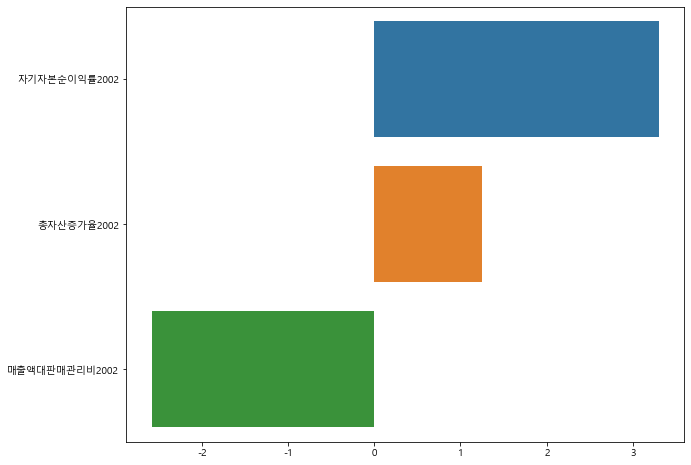

In [171]:
# 로지스틱 방식 사용시 회귀 트리의 COEF 파악
plt.rcParams["figure.figsize"] = (10,8)
feature_series = pd.Series(data = lg_clf.coef_[0], index=X_train.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)
print(feature_series)


샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11 16]
샘플 index로 추출한 임곗값 :  [1.   0.61 0.49 0.33]
샘플 임곗값별 FPR :  [0.    0.077 0.154 0.423]
샘플 임곗값별 TPR :  [0.071 0.357 0.857 0.929]
ROC_AUC Score : 0.8352


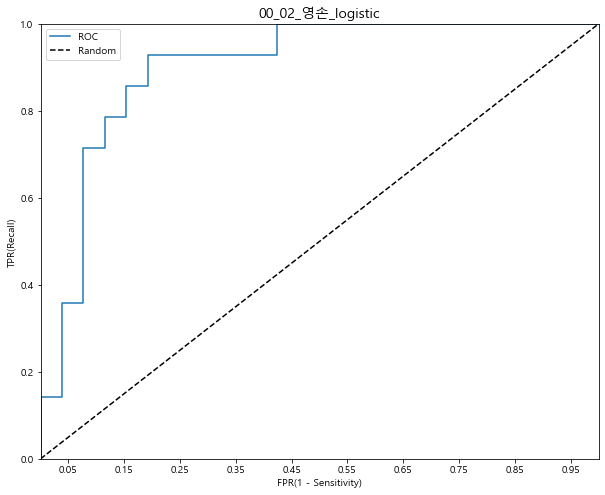

In [172]:
pred_proba_class1 = lg_clf.predict_proba(X_test)[:,1]
# lg_clf 부분은 모델마다 해당 모델을 지정하는 변수를 적으면 됩니다.

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('00_02_영손_logistic',fontdict={'fontsize':14})
    # 여기에 '기간_기업분류기준(ex:영손,이자)_모델이름'이런 식으로 작성해 주세요.
    
roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')
# 주의!! SVM에서는 모델 작성 시, probability=True 라는 값을 입력해야 roc-auc curve를 작성할 수 있다.


In [64]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)
y_pred = xgb_clf.predict(X_test)

params =  {'n_estimators' : [10,100,1000], 'learning_rate':[0.01,0.1,0.5], 'max_depth' : [3,4,5,6], 'min_child_weight' : [1,2], 'gamma' : [0,1,2]}



grid_tree = GridSearchCV(xgb_clf, param_grid=params, cv=7, refit=True,scoring='f1')
grid_tree.fit(X, y)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)


best parameters :  {'gamma': 1, 'learning_rate': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}
best score :  0.7933805325109672


In [158]:

xgb_clf = XGBClassifier(gamma=1, learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=100)
xgb_clf.fit(X_train,y_train)
y_pred = xgb_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

print('### XGB Classifier 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'f1 : {f1:.4f}')

### XGB Classifier 분류 결과 ###
ACC : 0.8750
Precision : 0.8462
Recall : 0.7857
f1 : 0.8148


Index([], dtype='object')


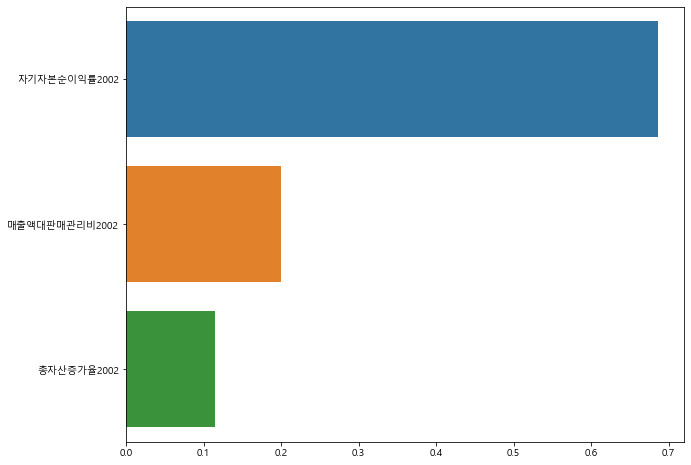

In [159]:
# XGB 방식 사용시 회귀 트리의 피쳐 중요도 파악
plt.rcParams["figure.figsize"] = (10,8)
feature_series = pd.Series(data = xgb_clf.feature_importances_, index=X_train.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)
print(feature_series.index[feature_series<=0.01])

샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11]
샘플 index로 추출한 임곗값 :  [0.94 0.55 0.14]
샘플 임곗값별 FPR :  [0.    0.077 0.269]
샘플 임곗값별 TPR :  [0.071 0.714 1.   ]
ROC_AUC Score : 0.8544


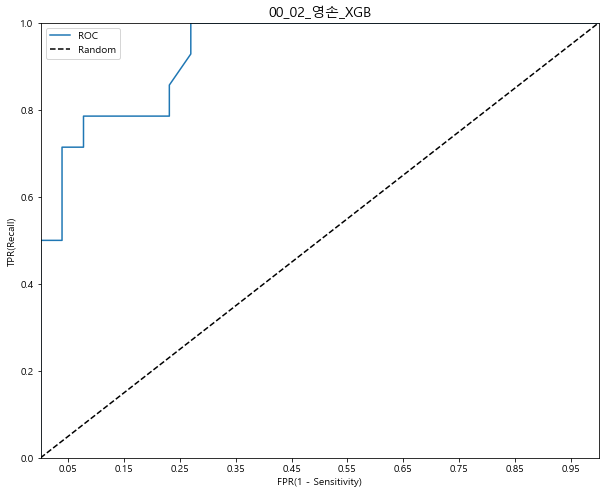

In [168]:
pred_proba_class1 = xgb_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('00_02_영손_XGB',fontdict={'fontsize':14})
    
roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')


# Decision tree

In [52]:
# GridSearchCV를 통한 회귀나무의 회귀의 최적 하이퍼 파라미터 찾기
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=9)

params = {'max_depth' : [2,3,4,5,6,7,8], 'min_samples_split':[1,2,3,4,5], 'max_features' : ['auto', 'sqrt', 'log2']}

grid_clf = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=7)
grid_clf1 = GridSearchCV(dt_clf, param_grid=params, scoring='f1', cv=7)
grid_clf.fit(X,y)
grid_clf1.fit(X,y)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {np.round(grid_clf.best_score_,4)}')
print(f'최적 하이퍼 파라미터 : {grid_clf1.best_params_}, 최적 평균 F1스코어 : {np.round(grid_clf1.best_score_,4)}')

최적 하이퍼 파라미터 : {'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2}, 최적 평균 정확도 : 0.8058
최적 하이퍼 파라미터 : {'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 2}, 최적 평균 F1스코어 : 0.7486


In [134]:
# 파라미터 튜닝 후 다시 회귀나무

dt_clf = DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_split=2, random_state=9)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

print('### Decision classifier 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')

### Decision classifier 분류 결과 ###
ACC : 0.8750
Precision : 0.8462
Recall : 0.7857
F1 Score : 0.8148


샘플 추출을 위한 임곗값 배열의 index :  [1 6]
샘플 index로 추출한 임곗값 :  [1.   0.05]
샘플 임곗값별 FPR :  [0.038 1.   ]
샘플 임곗값별 TPR :  [0. 1.]
ROC_AUC Score : 0.8544


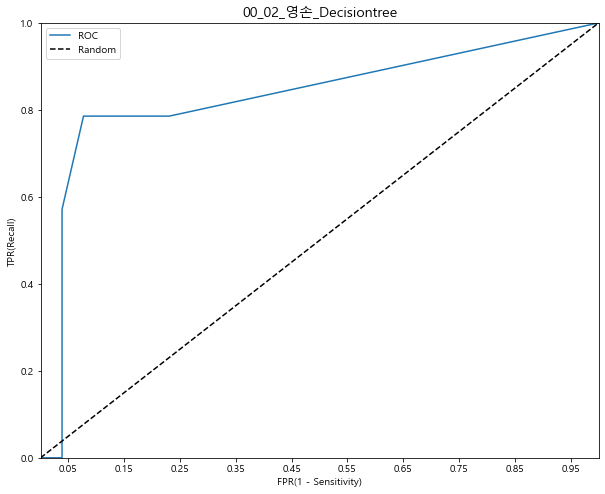

In [167]:
pred_proba_class1 = dt_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('00_02_영손_Decisiontree',fontdict={'fontsize':14})

    
roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')

In [55]:
# GridSearchCV를 통한 RF의 최적 하이퍼 파라미터 찾기
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=9)

# params = {'n_estimators' : [10,100,500,1000,10000], 'min_samples_leaf':[1,2,3,4,5], 'max_features' : ['auto', 'sqrt', 'log2'], 'criterion' : ['gini', 'entropy', 'log_loss']}
params = {'n_estimators' : [10,100,1000], 'min_samples_leaf':[2,3,4]}
grid_clf = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=7)
grid_clf1 = GridSearchCV(rf_clf, param_grid=params, scoring='f1', cv=7)
grid_clf.fit(X,y)
grid_clf1.fit(X,y)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {np.round(grid_clf.best_score_,4)}')
print(f'최적 하이퍼 파라미터 : {grid_clf1.best_params_}, 최적 평균 F1스코어 : {np.round(grid_clf1.best_score_,4)}')

최적 하이퍼 파라미터 : {'min_samples_leaf': 3, 'n_estimators': 100}, 최적 평균 정확도 : 0.8357
최적 하이퍼 파라미터 : {'min_samples_leaf': 3, 'n_estimators': 100}, 최적 평균 F1스코어 : 0.7934


In [138]:
# 파라미터 튜닝 후 다시 회귀나무

rf_clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, random_state=9)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

print('### RandomForest classifier 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')

### RandomForest classifier 분류 결과 ###
ACC : 0.8750
Precision : 0.8462
Recall : 0.7857
F1 Score : 0.8148


샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11]
샘플 index로 추출한 임곗값 :  [0.94 0.52 0.01]
샘플 임곗값별 FPR :  [0.    0.077 0.769]
샘플 임곗값별 TPR :  [0.143 0.786 1.   ]
ROC_AUC Score : 0.8544


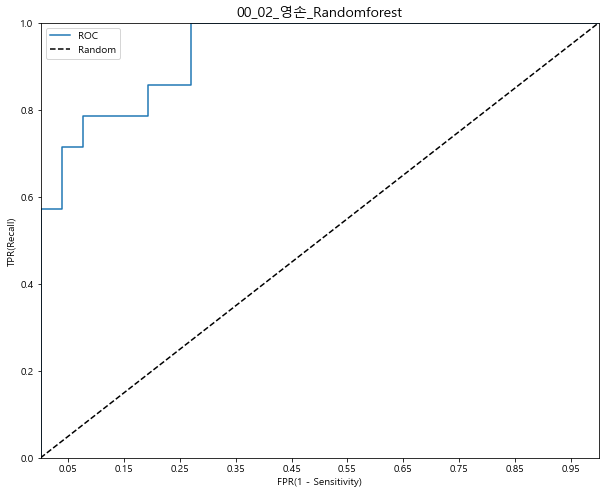

In [166]:
pred_proba_class1 = rf_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('00_02_영손_Randomforest',fontdict={'fontsize':14})
    
roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')

In [58]:
# GridSearchCV를 통한 SVM의 최적 하이퍼 파라미터 찾기
from sklearn import svm

svm_clf = svm.SVC(random_state=9)

# params = {'n_estimators' : [10,100,500,1000,10000], 'min_samples_leaf':[1,2,3,4,5], 'max_features' : ['auto', 'sqrt', 'log2'], 'criterion' : ['gini', 'entropy', 'log_loss']}
params = {'C' : [1, 10, 100], 'kernel' : ['linear', 'poly', 'rbf'],  'gamma' : [0.001, 0.01, 0.1]}
grid_clf = GridSearchCV(svm_clf, param_grid=params, scoring='accuracy', cv=7)
grid_clf1 = GridSearchCV(svm_clf, param_grid=params, scoring='f1', cv=7)
grid_clf.fit(X,y)
grid_clf1.fit(X,y)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {np.round(grid_clf.best_score_,4)}')
print(f'최적 하이퍼 파라미터 : {grid_clf1.best_params_}, 최적 평균 F1스코어 : {np.round(grid_clf1.best_score_,4)}')

최적 하이퍼 파라미터 : {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}, 최적 평균 정확도 : 0.8455
최적 하이퍼 파라미터 : {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}, 최적 평균 F1스코어 : 0.811


In [153]:
# SVM 모델링
from sklearn import svm

svm_clf  = svm.SVC(random_state=9, C=10, gamma=0.001, kernel = 'linear',probability=True)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

print('### SVM classifier 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')

### SVM classifier 분류 결과 ###
ACC : 0.8250
Precision : 0.7692
Recall : 0.7143
F1 Score : 0.7407


샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11]
샘플 index로 추출한 임곗값 :  [1.   0.55 0.38]
샘플 임곗값별 FPR :  [0.    0.038 0.308]
샘플 임곗값별 TPR :  [0.071 0.714 0.786]
ROC_AUC Score : 0.8544
0.8543956043956044


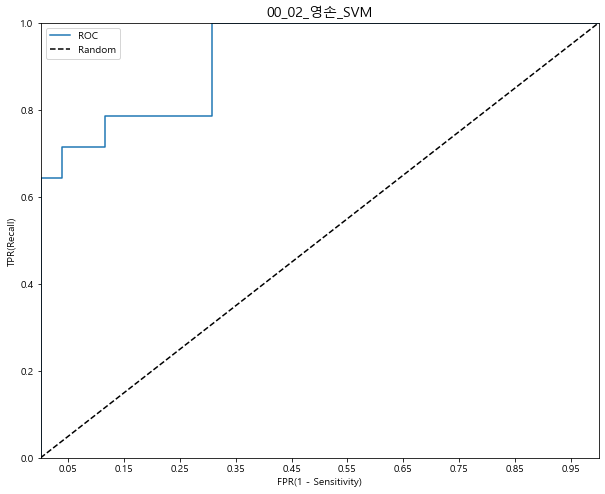

In [165]:
pred_proba_class1 = svm_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('00_02_영손_SVM',fontdict={'fontsize':14})

    
roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')
print(roc_auc)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

# GridSearchCV를 통한 kNN의 최적 하이퍼 파라미터 찾기

knn_clf = KNeighborsClassifier()

# params = {'n_estimators' : [10,100,500,1000,10000], 'min_samples_leaf':[1,2,3,4,5], 'max_features' : ['auto', 'sqrt', 'log2'], 'criterion' : ['gini', 'entropy', 'log_loss']}
params = {'n_neighbors' : [3, 4, 5, 6], 'p': [1,2], 'weights' : ['uniform', 'distance'] }
grid_clf = GridSearchCV(knn_clf, param_grid=params, scoring='accuracy', cv=7)
grid_clf1 = GridSearchCV(knn_clf, param_grid=params, scoring='f1', cv=7)
grid_clf.fit(X,y)
grid_clf1.fit(X,y)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {np.round(grid_clf.best_score_,4)}')
print(f'최적 하이퍼 파라미터 : {grid_clf1.best_params_}, 최적 평균 F1스코어 : {np.round(grid_clf1.best_score_,4)}')

최적 하이퍼 파라미터 : {'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}, 최적 평균 정확도 : 0.8406
최적 하이퍼 파라미터 : {'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}, 최적 평균 F1스코어 : 0.796


In [98]:

knn_clf = KNeighborsClassifier(n_neighbors=6, p = 2, weights='uniform')
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('### kNN classifier 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')

### kNN classifier 분류 결과 ###
ACC : 0.8500
Precision : 0.7857
Recall : 0.7857
F1 Score : 0.7857


샘플 추출을 위한 임곗값 배열의 index :  [1 6]
샘플 index로 추출한 임곗값 :  [1. 0.]
샘플 임곗값별 FPR :  [0.038 1.   ]
샘플 임곗값별 TPR :  [0.286 1.   ]
ROC_AUC Score : 0.8544
0.8543956043956044


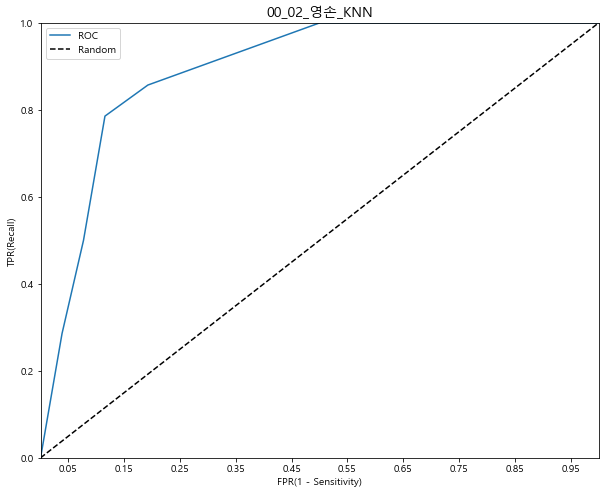

In [169]:
pred_proba_class1 = knn_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정된다.
# 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정 등
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.title('00_02_영손_KNN',fontdict={'fontsize':14})

    
roc_curve_plot(y_test, pred_proba_class1)
print(f'ROC_AUC Score : {roc_auc:.4f}')
print(roc_auc)